In [ ]:
suppressPackageStartupMessages({
  library(Seurat)
  library(monocle3)
  library(SeuratWrappers)
  library(dplyr)
  library(Matrix)
  library(ggplot2)
  library(patchwork)
  library(SingleCellExperiment)
  library(ggplot2)
  library(viridis)
})

Warning message:
“package ‘Seurat’ was built under R version 4.4.3”
Warning message:
“package ‘SeuratObject’ was built under R version 4.4.3”
Warning message:
“package ‘sp’ was built under R version 4.4.3”
Warning message:
“package ‘monocle3’ was built under R version 4.4.3”
Warning message:
“package ‘matrixStats’ was built under R version 4.4.3”


In [ ]:
adult_obj <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/subclusters/myeloid/annotated/myeloid_clean_annotated.rds')
adult_obj

An object of class Seurat 
69212 features across 94270 samples within 2 assays 
Active assay: SCT (30606 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, harmony, umap.harmony

In [ ]:
table(adult_obj$general_cell_type)


   C1Q_MHCII_TAM          HSP_TAM      Hypoxic_TAM          IFN_TAM 
           22753             1306            10159             9421 
Inflammatory_TAM         MERT_TAM         Monocyte       Neutrophil 
            7800            25707             5158             6503 
        SPP1_TAM 
            5463 

In [ ]:
malignant_obj <- subset(
  adult_obj,
  subset = general_cell_type != 'Neutrophil'
)

dim(malignant_obj)

[1] 30606 87767

In [ ]:
malignant_obj@meta.data |> head(2)
malignant_obj$general_cell_type |> unique()
malignant_obj

,orig.ident,nCount_RNA,nFeature_RNA,project_id,orig_sample_id,sample_uid,genome,chemistry,percent.mt,doublet_class,⋯,SCT_snn_res.0.2,SCT_snn_res.0.4,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.7,SCT_snn_res.0.8,SCT_snn_res.1,SCT_snn_res.1.2,seurat_clusters,general_cell_type
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1,PRJNA1125010,1175,713,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,10.978723,singlet,⋯,0,0,0,0,0,0,0,0,0,C1Q_MHCII_TAM
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1,PRJNA1125010,4284,2090,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,1.960784,singlet,⋯,4,6,6,6,6,7,3,4,4,MERT_TAM


[1] "C1Q_MHCII_TAM"    "MERT_TAM"         "Hypoxic_TAM"      "SPP1_TAM"        
[5] "Monocyte"         "Inflammatory_TAM" "IFN_TAM"          "HSP_TAM"

An object of class Seurat 
69212 features across 87767 samples within 2 assays 
Active assay: SCT (30606 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, harmony, umap.harmony

In [ ]:
DefaultAssay(malignant_obj) <- "SCT"  # critical for as.cell_data_set()

In [ ]:
cds <- as.cell_data_set(malignant_obj)

cds

Warning message:
“Monocle 3 trajectories require cluster partitions, which Seurat does not calculate. Please run 'cluster_cells' on your cell_data_set object”


class: cell_data_set 
dim: 30606 87767 
metadata(0):
assays(2): counts logcounts
rownames(30606): ENSG00000238009 ENSG00000241860 ... ENSG00000287806
  AVPR2
rowData names(0):
colnames(87767):
  PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1
  PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1
  ...
  PRJNA995768__PRJNA995768__filtered_feature_bc_matrix__SAMN36505073_TTTGTCAAGGCGACAT-1
  PRJNA995768__PRJNA995768__filtered_feature_bc_matrix__SAMN36505073_TTTGTCACATGTCCTC-1
colData names(36): orig.ident nCount_RNA ... ident Size_Factor
reducedDimNames(3): PCA HARMONY UMAP.HARMONY
mainExpName: SCT
altExpNames(0):

In [ ]:
head(colnames(cds))
head(rownames(cds))

colData(cds) |> as.data.frame() |> head()
rowData(cds) |> as.data.frame() |> head()

[1] "PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1"
[2] "PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1"
[3] "PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1"
[4] "PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1"
[5] "PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1"
[6] "PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1"

[1] "ENSG00000238009" "ENSG00000241860" "ENSG00000290385" "ENSG00000291215"
[5] "LINC01409"       "ENSG00000290784"

,orig.ident,nCount_RNA,nFeature_RNA,project_id,orig_sample_id,sample_uid,genome,chemistry,percent.mt,doublet_class,⋯,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.7,SCT_snn_res.0.8,SCT_snn_res.1,SCT_snn_res.1.2,seurat_clusters,general_cell_type,ident,Size_Factor
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<dbl>
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1,PRJNA1125010,1175,713,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,10.9787234,singlet,⋯,0,0,0,0,0,0,0,C1Q_MHCII_TAM,1,4476
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1,PRJNA1125010,4284,2090,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,1.9607843,singlet,⋯,6,6,6,7,3,4,4,MERT_TAM,0,5278
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1,PRJNA1125010,44655,6053,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,3.7509797,singlet,⋯,18,18,17,19,20,28,28,C1Q_MHCII_TAM,1,6484
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1,PRJNA1125010,29414,6000,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,1.6114775,singlet,⋯,6,6,6,7,3,4,4,MERT_TAM,0,6345
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1,PRJNA1125010,3246,1661,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,0.8934073,singlet,⋯,15,15,15,15,12,14,14,Hypoxic_TAM,2,4914
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1,PRJNA1125010,10869,3658,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,12.9358727,singlet,⋯,2,2,1,1,1,1,1,MERT_TAM,0,6872


ENSG00000238009
ENSG00000241860
ENSG00000290385
ENSG00000291215
LINC01409
ENSG00000290784


In [ ]:
if (is.null(rowData(cds)$gene_short_name)) {
  rowData(cds)$gene_short_name <- rownames(cds)
}

In [ ]:
# Ensure the same cells (order) in Seurat and CDS
all(colnames(malignant_obj) == colnames(cds))
# If FALSE, reorder:

cds <- cds[, colnames(malignant_obj)]

[1] TRUE

In [ ]:
# Extract Harmony embeddings
harm <- Embeddings(malignant_obj, "harmony")  # matrix: cells x dims
dim(harm)
head(harm[, 1:5])

[1] 87767    50

,harmony_1,harmony_2,harmony_3,harmony_4,harmony_5
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1,-15.853236,-3.342554,-3.621113,-0.5052105,2.643085
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1,22.125178,9.117247,6.421647,-8.5346568,14.700782
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1,8.980117,8.632856,-10.406330,4.7819766,19.964667
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1,5.923652,6.077793,5.129676,-2.6559370,11.818529
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1,-32.005983,60.602893,9.543225,-9.7325562,-9.457936
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1,12.945955,-8.079107,7.518873,-12.7057660,9.907307


In [ ]:
num_dim <- min(50, ncol(harm))
harm_use <- harm[, 1:num_dim]

In [ ]:
cds <- preprocess_cds(
  cds,
  num_dim = num_dim,                # same as Harmony
  method = "PCA",
  norm_method = "log"               # fine for SCT
)

In [ ]:
reducedDims(cds)$PCA <- harm_use

In [ ]:
umap_harm <- Embeddings(malignant_obj, "umap.harmony")
reducedDims(cds)$UMAP <- umap_harm

In [ ]:
# cds <- reduce_dimension(
#   cds,
#   reduction_method   = "UMAP",
#   preprocess_method  = "PCA",
#   umap.metric        = "cosine",
#   umap.min_dist      = 0.1,
#   umap.n_neighbors   = 30L
# )

In [ ]:
cds <- cluster_cells(
  cds,
  reduction_method = "UMAP",
  k = 20          # adjust; smaller = fewer, bigger = more clusters
)

table(partitions(cds))
table(clusters(cds))


    1     2 
87670    97 


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
5664 5099 4912 4869 4461 4373 4010 3812 3774 3606 3194 3182 2969 2928 2718 2663 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
2536 2453 2415 2092 2057 2039 1988 1775 1669 1666 1344 1262 1171  944   97   25 

In [ ]:
cds <- learn_graph(
  cds,
  use_partition = TRUE,     # or FALSE if you want one global trajectory
  close_loop = FALSE        # TRUE if you suspect cycles
)

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the monocle3 package.
  Please report the issue to the authors.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the monocle3 package.
  Please report the issue to the authors.”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.
ℹ The deprecated feature was likely used in the monocle3 package.
  Please report the issue to the authors.”


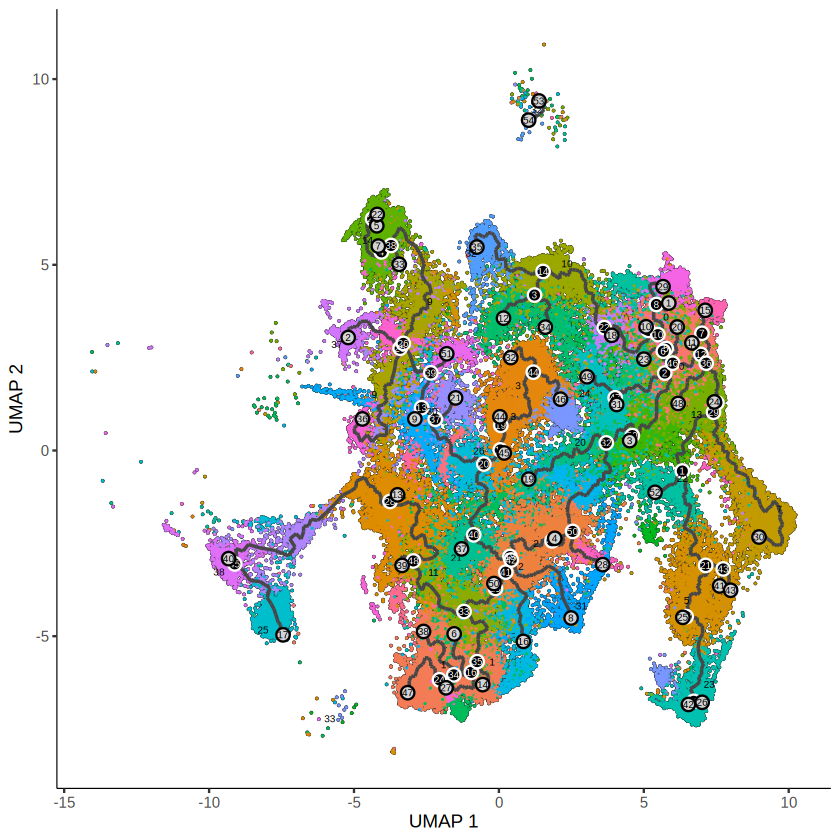

In [ ]:
plot_cells(
  cds,
  color_cells_by = "seurat_clusters",  # or any meta column
  label_groups_by_cluster = TRUE,
  label_leaves = TRUE,
  label_branch_points = TRUE
)

In [ ]:
get_earliest_principal_node <- function(cds, time_bin="Monocyte"){
  cell_ids <- which(colData(cds)[, "general_cell_type"] == time_bin)

  closest_vertex <-
    cds@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
  closest_vertex <- as.matrix(closest_vertex[colnames(cds), ])

  root_pr_nodes <-
    igraph::V(principal_graph(cds)[["UMAP"]])$name[
      as.numeric(names(which.max(table(closest_vertex[cell_ids, ]))))
    ]

  root_pr_nodes
}

cds <- order_cells(cds, root_pr_nodes = get_earliest_principal_node(cds))

In [ ]:
# table(colData(cds)$general_cell_type)

# root_cells <- colnames(cds)[cds$general_cell_type == "OPC_like"]

# length(root_cells)

# cds <- order_cells(
#   cds,
#   root_cells = root_cells
# )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   20.86   28.57     Inf   34.09     Inf 

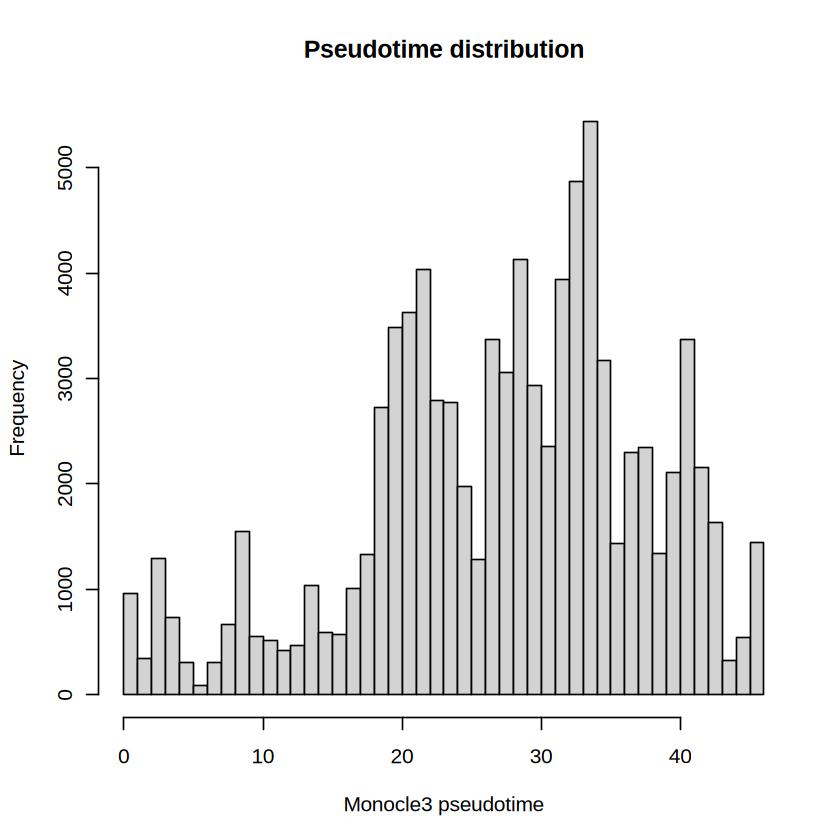

In [ ]:
pseudo <- pseudotime(cds)
summary(pseudo)

# Example: show distribution
hist(pseudo, breaks = 50, main = "Pseudotime distribution", xlab = "Monocle3 pseudotime")

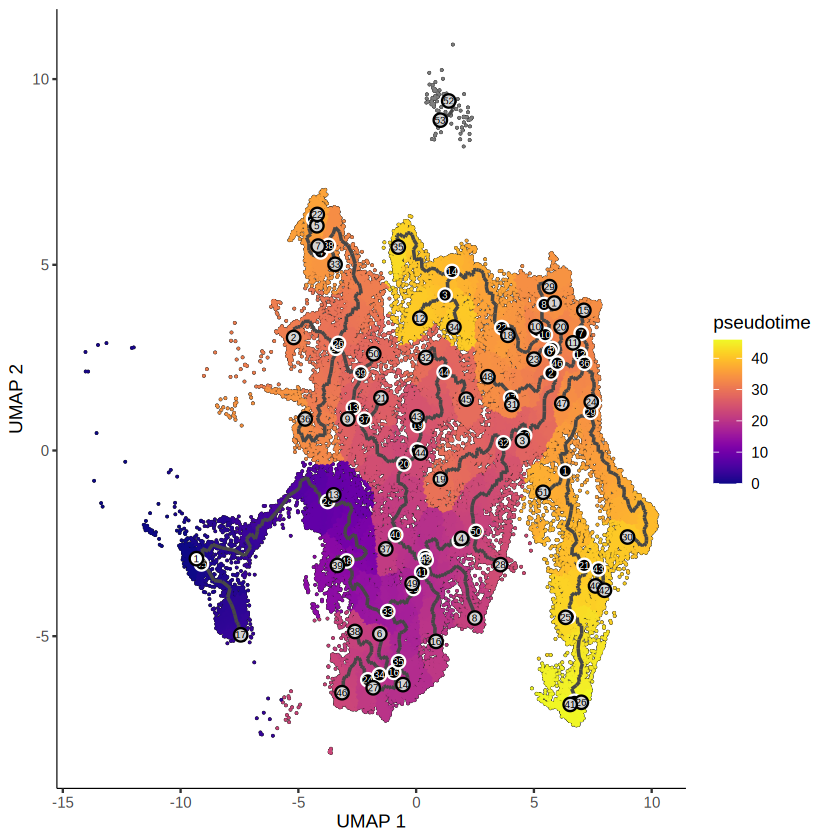

In [ ]:
plot_cells(
  cds,
  color_cells_by = "pseudotime",
  label_cell_groups = FALSE,
  label_leaves = TRUE,
  label_branch_points = TRUE
)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


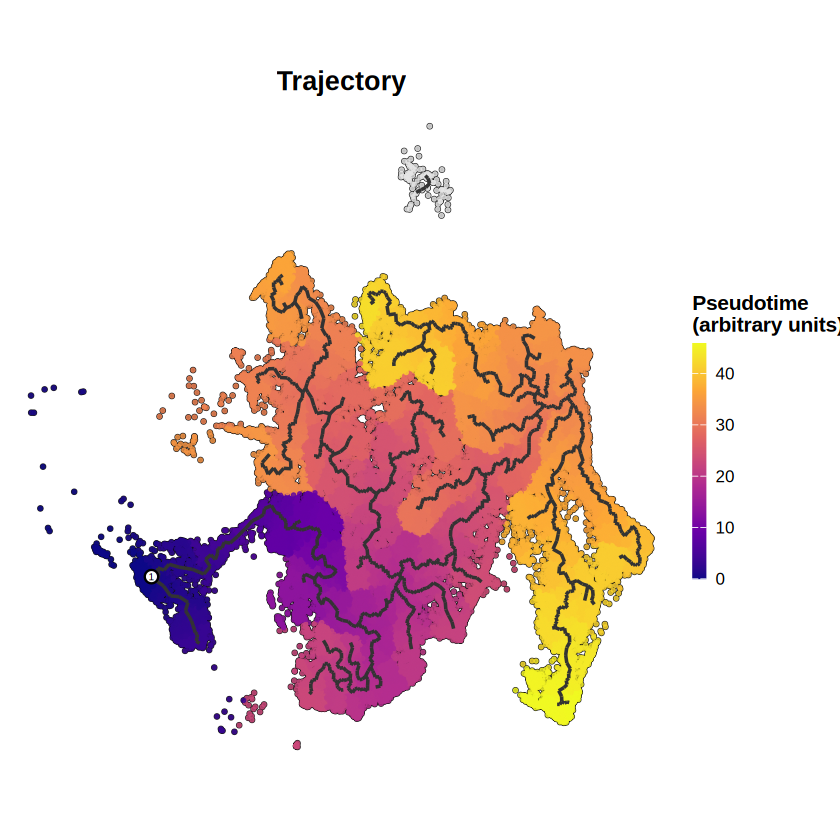

In [ ]:
p_traj <- plot_cells(
  cds,
  color_cells_by = "pseudotime",
  
  # A. Refine the Points
  cell_size = 0.7,           # Adjust based on cell count (0.5 for >50k cells)
  alpha = 0.8,               # Slight transparency helps see density
  show_trajectory_graph = TRUE,
  
  # B. Refine the Line (The "Skeleton")
  trajectory_graph_color = "grey20", # Softer than pure black
  trajectory_graph_segment_size = 0.75, # Thinner, elegant line
  
  # C. Labels
  label_cell_groups = FALSE,
  label_groups_by_cluster = FALSE,
  label_leaves = FALSE,       # Often too messy, hide unless critical
  label_branch_points = FALSE # Often too messy, hide unless critical
) +
  
  # 2. COLOR SCALE
  scale_color_viridis_c(
    option = "plasma", 
    name = "Pseudotime\n(arbitrary units)",
    direction = 1, # Dark = Early, Bright = Late
    na.value = "grey90" # Color for cells not in the trajectory (disconnected)
  ) +
  
  # 3. CLEAN THEME
  theme_void() + # Removes axes (standard for UMAP/Trajectories)
  theme(
    # Legend Styling
    legend.position = "right", 
    legend.title = element_text(size = 12, face = "bold", family = "Arial"),
    legend.text = element_text(size = 10, family = "Arial"),
    legend.key.height = unit(1, "cm"), # Long elegant color bar
    legend.key.width = unit(0.3, "cm"),
    
    # Title
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5, family = "Arial"),
    
    # Aspect Ratio
    aspect.ratio = 1
  ) +
  ggtitle("Trajectory")

p_traj

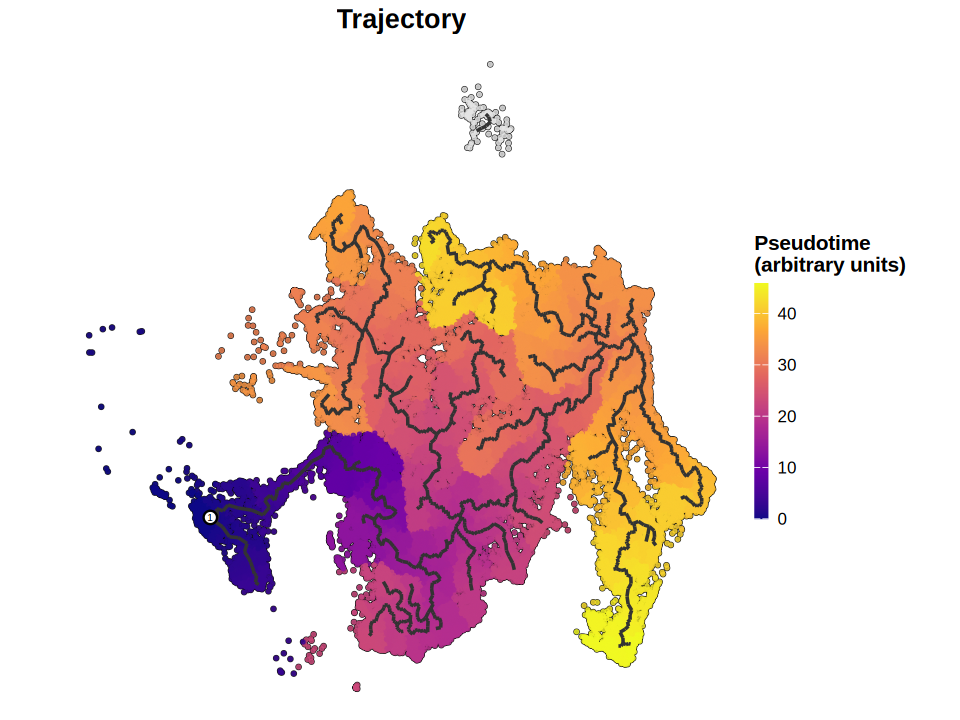

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6)
p_traj

In [ ]:
# Save 
ggsave(
  filename = "/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/pub_image/Pseudotime_Publication_Ready.png",
  plot = p_traj,
  device = "png",        # Uses svglite if installed
  width = 8,             # Width in inches
  height = 6,            # Height in inches
  units = "in",
  dpi = 600,             # Even for vectors, this sets precision
  bg = "white",          # Ensure background isn't transparent (optional)
  limitsize = FALSE      # Allows saving large files if necessary
)

Cells aren't colored in a way that allows them to be grouped.



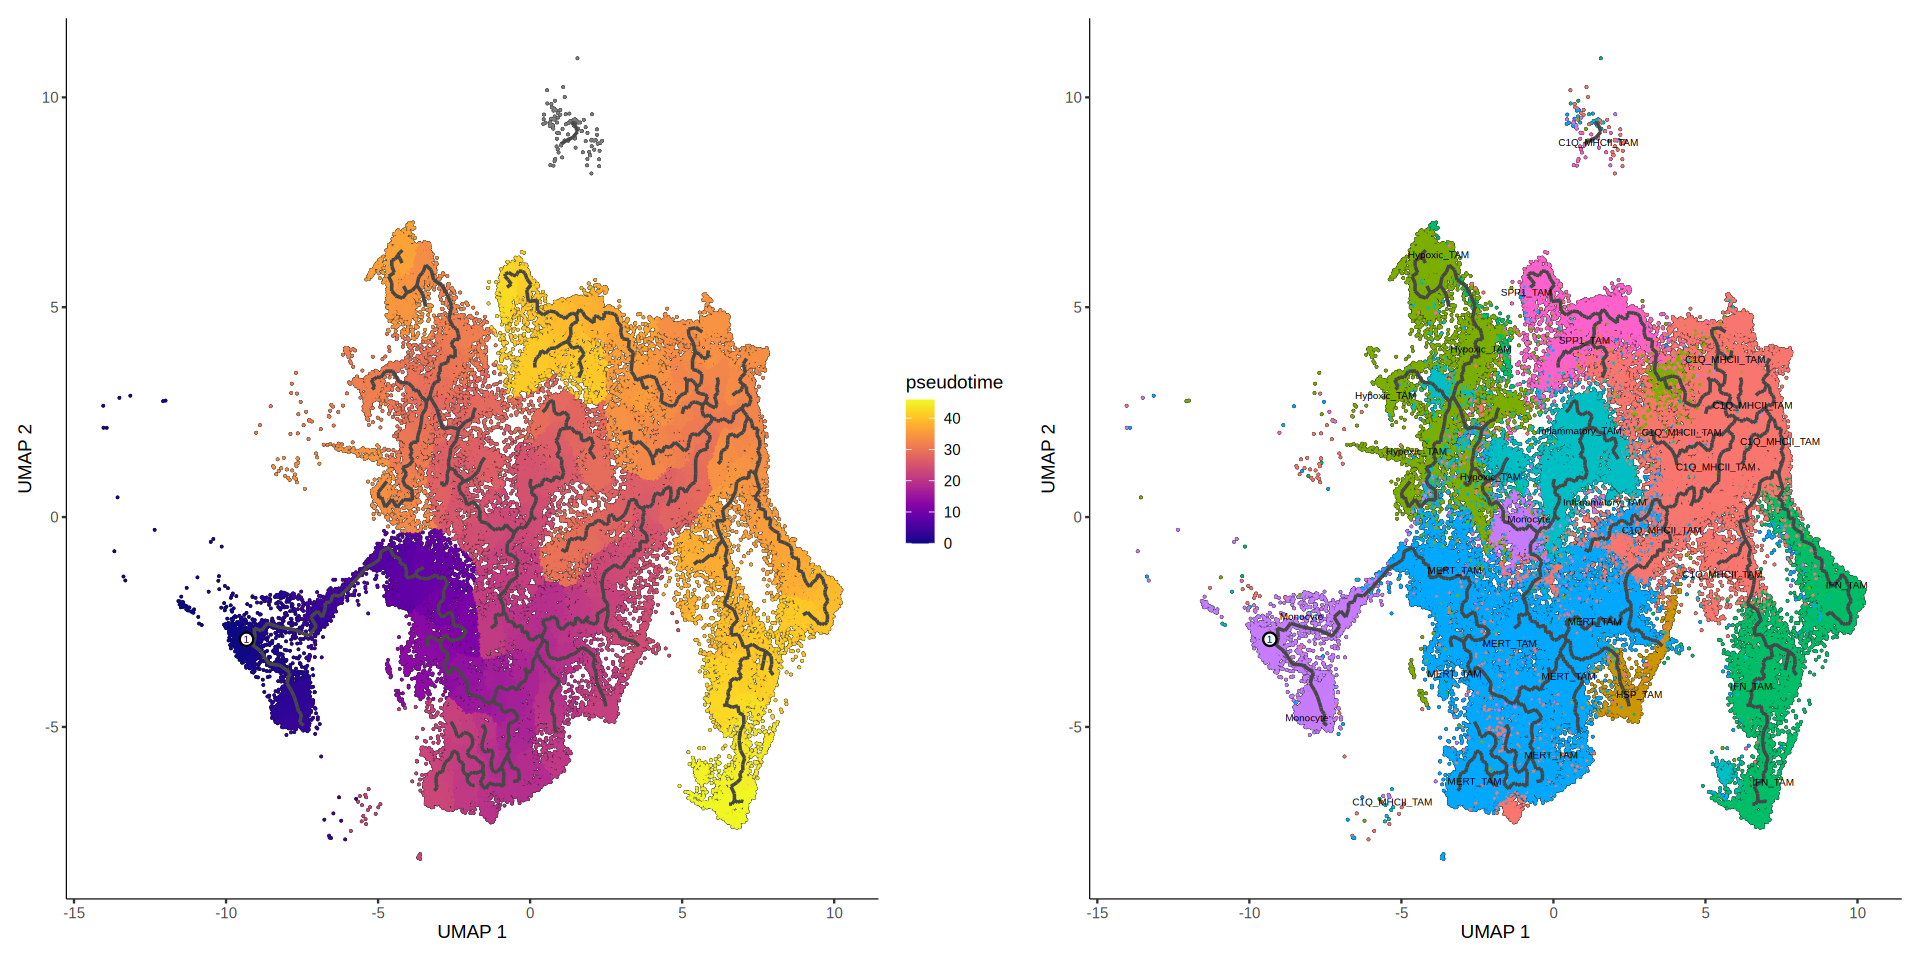

In [ ]:
p1_corrected <- plot_cells(
  cds,
  color_cells_by = "pseudotime",
  # REMOVE group_cells_by to avoid the error
  label_cell_groups = TRUE, # Will label based on the color_cells_by variable
  label_leaves = FALSE,
  label_branch_points = FALSE
)

p2 <- plot_cells(
  cds,
  color_cells_by = "general_cell_type",
  label_cell_groups = TRUE,
  label_leaves = FALSE,
  label_branch_points = FALSE
)

options(repr.plot.width = 16, repr.plot.height = 8)
p1_corrected + p2

In [ ]:
cds_pt_res <- graph_test(cds, neighbor_graph = "principal_graph", cores = 40)

  |=======================================================| 100%, Elapsed 05:21


In [ ]:
cds_pt_res <- na.omit(cds_pt_res)
cds_pt_res <- cds_pt_res[cds_pt_res$p_value < 0.05 & cds_pt_res$status == "OK", ]
cds_pt_res |> head()

,status,p_value,morans_test_statistic,morans_I,gene_short_name,q_value
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
ENSG00000291215,OK,3.068443e-16,8.086569,0.008012803,ENSG00000291215,8.493170e-16
LINC01409,OK,9.082393e-09,5.628629,0.005582561,LINC01409,2.102041e-08
LINC00115,OK,1.632922e-20,9.209849,0.009114641,LINC00115,4.854798e-20
LINC01128,OK,6.305263e-06,4.366756,0.004331170,LINC01128,1.317402e-05
ENSG00000288531,OK,3.058527e-05,4.008249,0.003773298,ENSG00000288531,6.195013e-05
FAM41C,OK,2.265474e-26,10.560736,0.010293858,FAM41C,7.308868e-26


In [ ]:
cds_pt_res[order(-cds_pt_res$morans_test_statistic), ] |> head()

,status,p_value,morans_test_statistic,morans_I,gene_short_name,q_value
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
S100A8,OK,0,698.0526,0.6951108,S100A8,0
S100A9,OK,0,595.3031,0.5928097,S100A9,0
IFI27,OK,0,586.5168,0.5840452,IFI27,0
CXCL10,OK,0,576.5426,0.5707388,CXCL10,0
ISG15,OK,0,563.5043,0.5611296,ISG15,0
FTL,OK,0,558.7495,0.5564271,FTL,0


In [ ]:
# Subset the top hits
top_hits <- cds_pt_res[order(cds_pt_res$morans_test_statistic, decreasing = TRUE), ]
head(top_hits, 10)

,status,p_value,morans_test_statistic,morans_I,gene_short_name,q_value
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
S100A8,OK,0,698.0526,0.6951108,S100A8,0
S100A9,OK,0,595.3031,0.5928097,S100A9,0
IFI27,OK,0,586.5168,0.5840452,IFI27,0
CXCL10,OK,0,576.5426,0.5707388,CXCL10,0
ISG15,OK,0,563.5043,0.5611296,ISG15,0
FTL,OK,0,558.7495,0.5564271,FTL,0
S100A12,OK,0,510.1538,0.5078556,S100A12,0
TMSB4X,OK,0,509.1229,0.5070046,TMSB4X,0
IFITM1,OK,0,501.0663,0.4989295,IFITM1,0


In [ ]:
# Get top 50 genes based on morans_test_statistic
top_50_genes <- top_hits[1:50,]

# Print the first few rows to verify
head(top_50_genes)

,status,p_value,morans_test_statistic,morans_I,gene_short_name,q_value
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
S100A8,OK,0,698.0526,0.6951108,S100A8,0
S100A9,OK,0,595.3031,0.5928097,S100A9,0
IFI27,OK,0,586.5168,0.5840452,IFI27,0
CXCL10,OK,0,576.5426,0.5707388,CXCL10,0
ISG15,OK,0,563.5043,0.5611296,ISG15,0
FTL,OK,0,558.7495,0.5564271,FTL,0


In [ ]:
write.csv(top_hits, file = "/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/subclusters/myeloid/trajectory/myeloid_trajectory.csv", row.names = TRUE)

Warning message:
“the ‘subbars’ function has moved to the reformulas package. Please update your imports, or ask an upstream package maintainter to do so.
This warning is displayed once per session.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


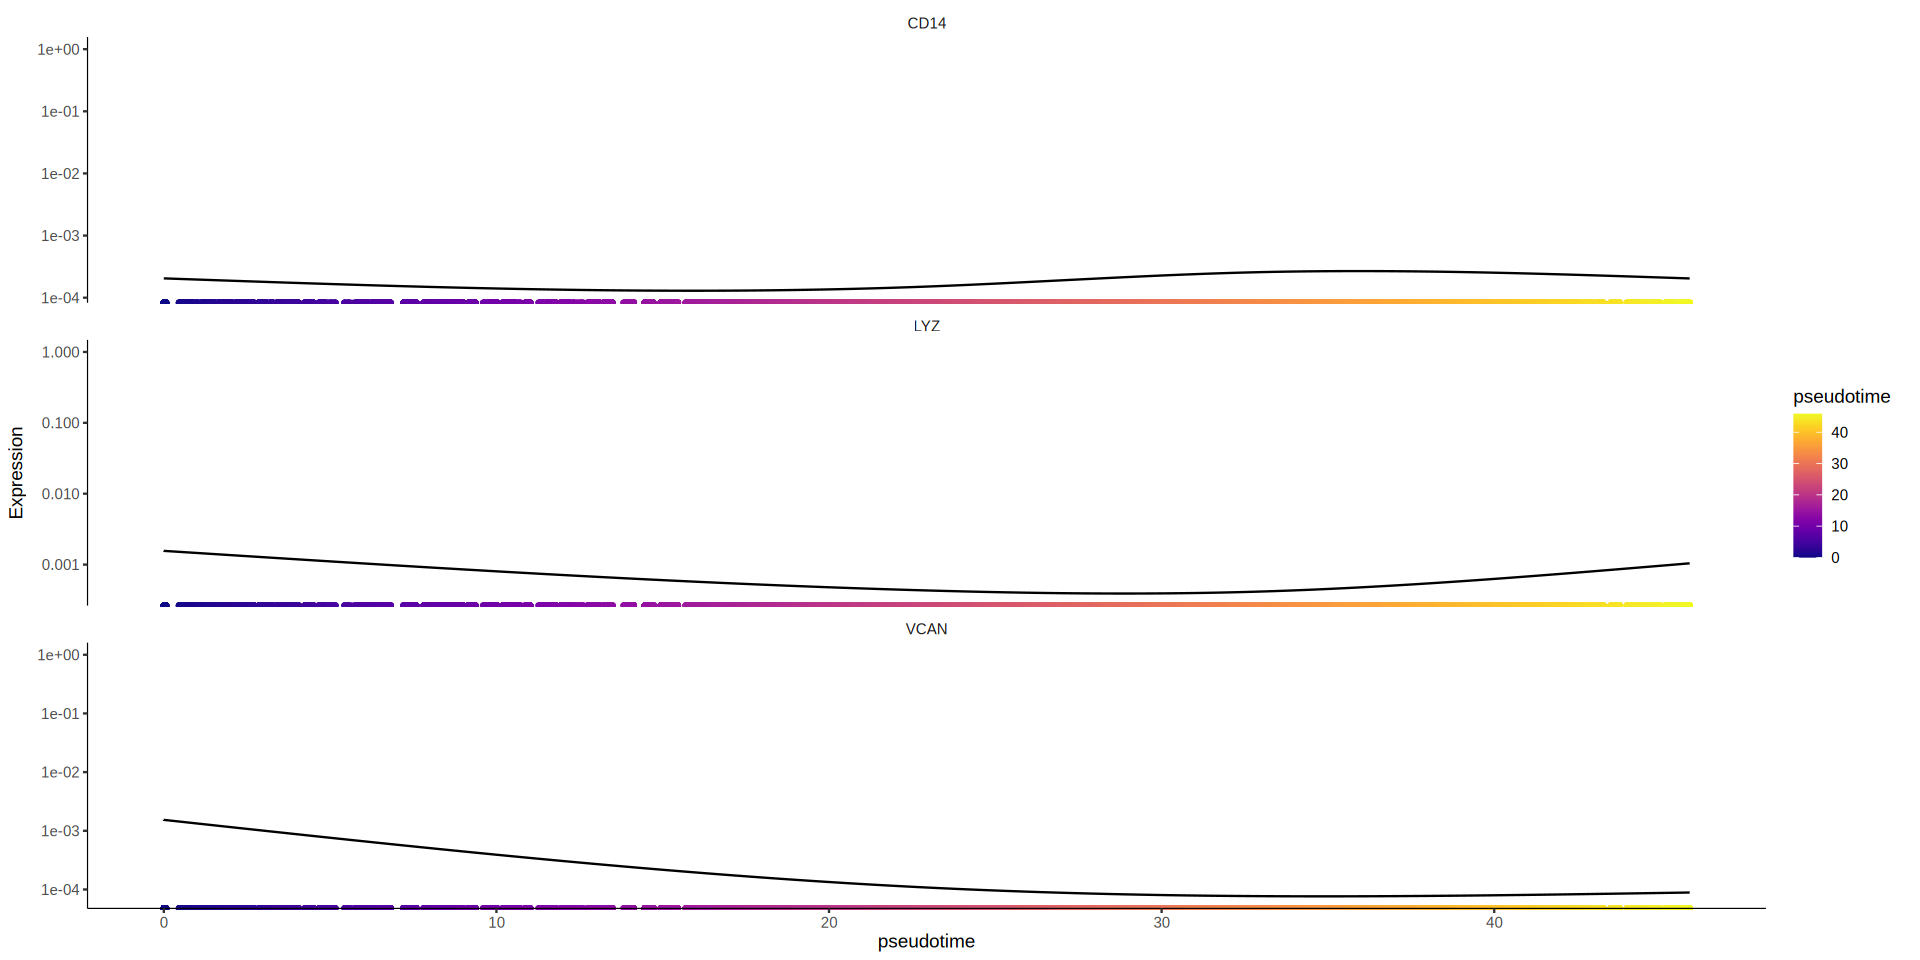

In [ ]:
plot_genes_in_pseudotime(
  cds[rowData(cds)$gene_short_name %in% c("CD14", "LYZ", 'VCAN')],
  label_by_short_name = TRUE
)

In [ ]:
library(tidyr)

Warning message:
“package ‘tidyr’ was built under R version 4.4.3”

Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack


The following object is masked from ‘package:S4Vectors’:

    expand




In [ ]:
# Select markers to plot
genes_to_plot <- c("CD14", "CLEC12A",  "JAML", "LYZ", "VCAN")

# Extract expression data and pseudotime
gene_module_df <- as.data.frame(t(as.matrix(logcounts(cds[rowData(cds)$gene_short_name %in% genes_to_plot,]))))
colnames(gene_module_df) <- rowData(cds[rowData(cds)$gene_short_name %in% genes_to_plot,])$gene_short_name

# Add pseudotime information
gene_module_df$pseudotime <- pseudotime(cds)

# Reshape data to long format for plotting
gene_long <- gene_module_df %>%
    pivot_longer(cols = all_of(genes_to_plot),
                             names_to = "Gene",
                             values_to = "Expression")
                             
# # Plot expression trends over pseudotime with improved visualization
# options(repr.plot.width=8, repr.plot.height=3)
# ggplot(gene_long, aes(x = pseudotime, y = Expression, color = Gene)) +
#     geom_point(size = 0.8, alpha = 0.2) +  # Slightly larger points but more transparent
#     geom_smooth(method = "loess", se = TRUE, span = 0.2, linewidth = 1.5) +  # Thicker smoothed lines
#     scale_color_brewer(palette = "Set1") +
#     labs(x = "Pseudotime", y = "Expression level") +
#          #title = "Monocyte Gene Expression along Pseudotime") +
#     theme_minimal() +
#     theme(
#         legend.position = "right",
#         legend.key.size = unit(1.2, "cm"),  # Larger legend keys
#         panel.grid.minor = element_blank(),
#         panel.grid.major = element_line(linewidth = 0.3, color = "grey90"),
#         #plot.title = element_text(size = 16, face = "bold"),
#         axis.title = element_text(size = 14, face = "bold"),
#         axis.text = element_text(size = 12),
#         legend.title = element_text(size = 14, face = "bold"),
#         legend.text = element_text(size = 12)
#     )

Warning message:
“Removed 485 rows containing non-finite outside the scale range
(`stat_smooth()`).”


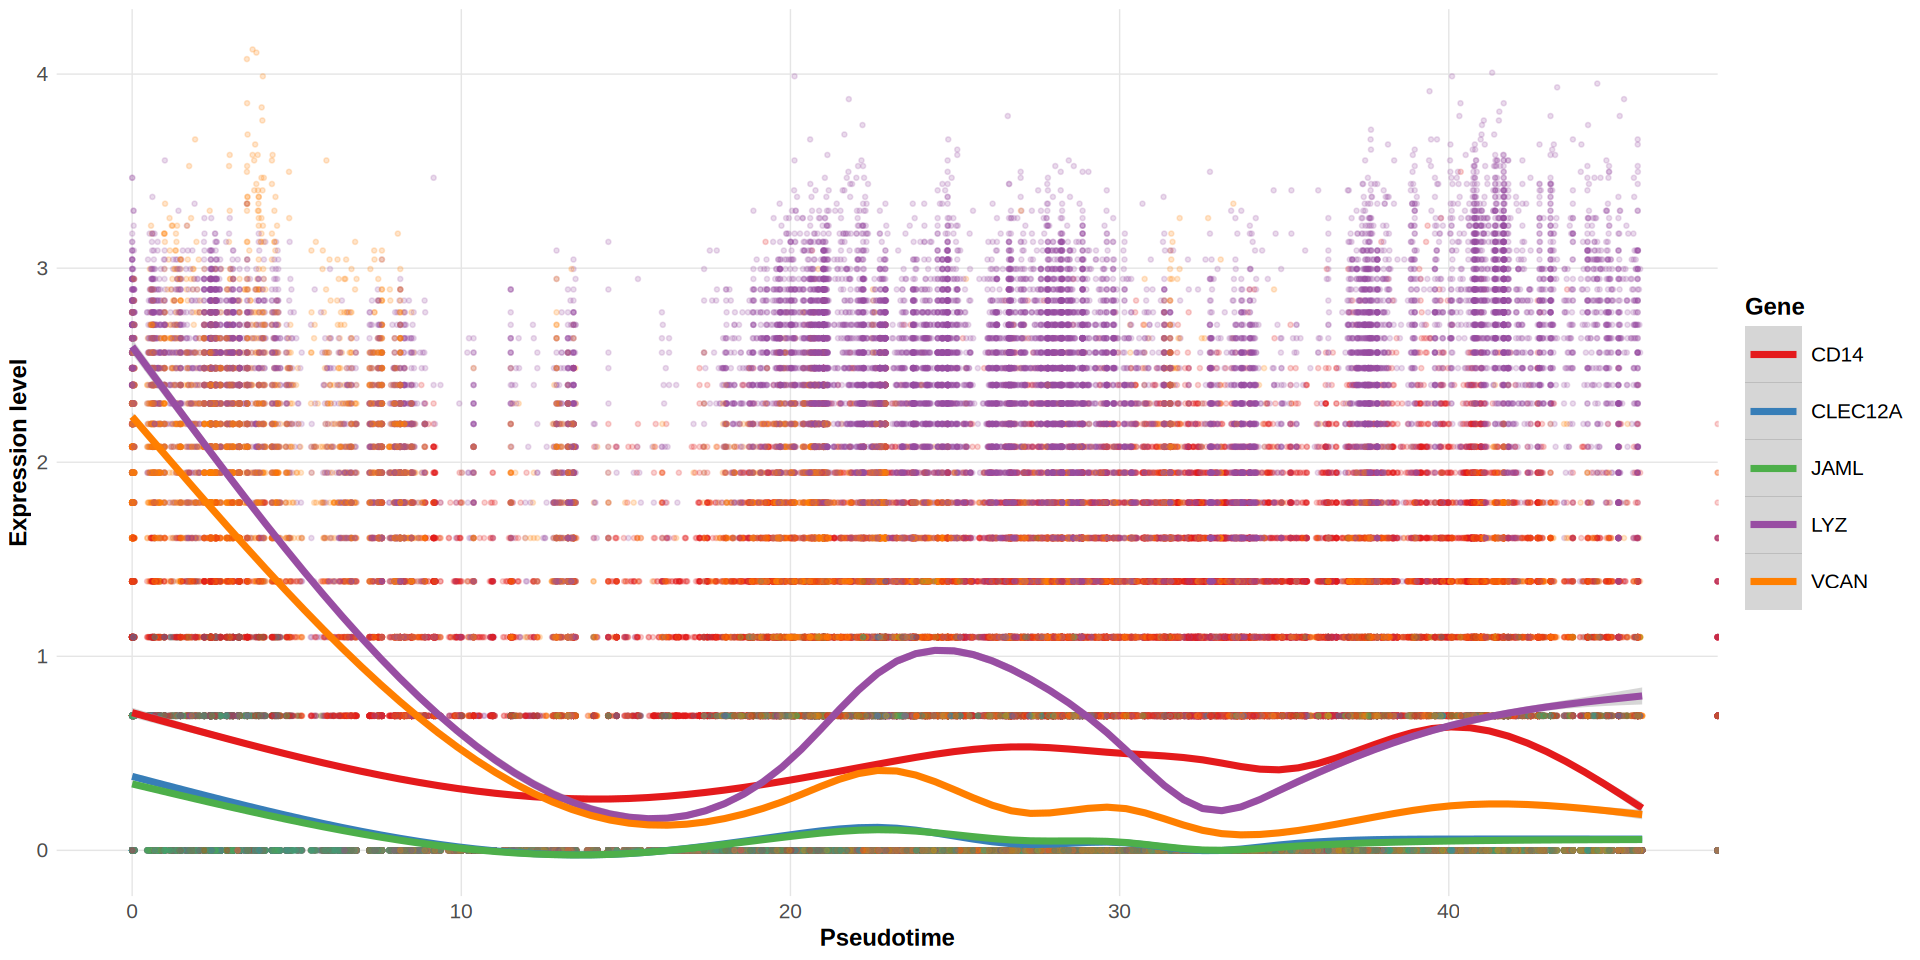

In [ ]:
ggplot(gene_long, aes(x = pseudotime, y = Expression, color = Gene)) +
    # 1. Points layer
    geom_point(size = 0.8, alpha = 0.2) + 
    
    # 2. Smoothing layer - CHANGED to GAM to fix memory error
    geom_smooth(method = "gam", formula = y ~ s(x, bs = "cs"), 
                se = TRUE, linewidth = 1.5) + 
    
    scale_color_brewer(palette = "Set1") +
    labs(x = "Pseudotime", y = "Expression level") +
    theme_minimal() +
    theme(
        legend.position = "right",
        legend.key.size = unit(1.2, "cm"),
        panel.grid.minor = element_blank(),
        panel.grid.major = element_line(linewidth = 0.3, color = "grey90"),
        axis.title = element_text(size = 14, face = "bold"),
        axis.text = element_text(size = 12),
        legend.title = element_text(size = 14, face = "bold"),
        legend.text = element_text(size = 12)
    )